# Quantum Computing

##  Deutsch-Jozsa Algorithm

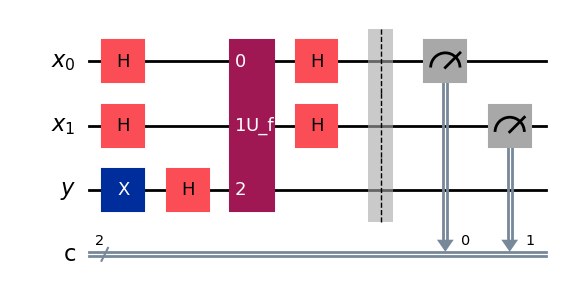

Constant function counts: {'00': 2048}


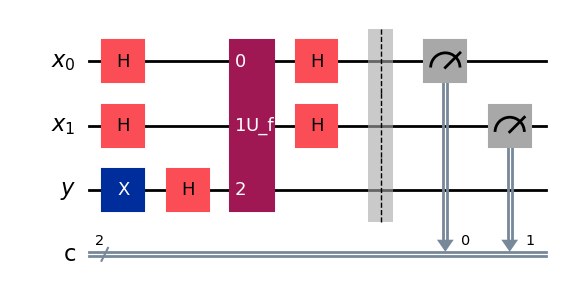

Balanced function counts: {'01': 2048}


In [5]:
# Deutsch–Jozsa

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

def make_dj_oracle(n, a_bits, b_bit):
    """ Build a (n+1)-qubit oracle U_f for f(x) = a·x ⊕ b."""

    qr_in = QuantumRegister(n, name="x")
    qr_y  = QuantumRegister(1, name="y")
    oracle = QuantumCircuit(qr_in, qr_y, name="U_f")

    # If b = 1, flip the output qubit
    if b_bit == 1:
        oracle.x(qr_y[0])

    # For each i with a_i = 1, apply CNOT from x_i to y
    for i, a_i in enumerate(a_bits):
        if a_i == 1:
            oracle.cx(qr_in[i], qr_y[0])
    # display(oracle.draw("mpl"))

    return oracle

def deutsch_jozsa_circuit(n, a_bits, b_bit):
    """
    Build the  Deutsch–Jozsa circuit for given (a, b).
    """
    # Registers
    qr_in = QuantumRegister(n, name="x")
    qr_y  = QuantumRegister(1, name="y")
    cr    = ClassicalRegister(n, name="c")
    qc    = QuantumCircuit(qr_in, qr_y, cr, name="DJ")

    #  Initialize
    qc.x(qr_y[0])

    #  Hadamards on all qubits
    qc.h(qr_in)
    qc.h(qr_y)

    #  Oracle U_f
    oracle = make_dj_oracle(n, a_bits, b_bit)
    qc.append(oracle.to_gate(), qr_in[:] + qr_y[:])

    #  Hadamards on input register
    qc.h(qr_in)

    #  Measure input register (y is ignored)
    qc.barrier()
    qc.measure(qr_in, cr)

    return qc

def run_dj(n, a_bits, b_bit, shots=2048, draw=False, title=None):
    """
    Build and run the DJ circuit on simulator and return counts.
    draw the circuit and plot a histogram.
    """
    backend = Aer.get_backend("qasm_simulator")
    qc = deutsch_jozsa_circuit(n, a_bits, b_bit)
    tqc = transpile(qc, backend)

    job = backend.run(tqc, shots=shots)
    result = job.result()
    counts = result.get_counts()

    if draw:
        display(qc.draw("mpl", fold=-1))
        plot_histogram(counts, title=title if title else "Deutsch–Jozsa Result")

    return counts



#  CONSTANT function
n = 2
a_const = [0]*n
b_const = 1
counts_const = run_dj(n, a_const, b_const, draw=True, title="Constant function")
print("Constant function counts:", counts_const)

# BALANCED function
a_bal = [1, 0]
b_bal = 0
counts_bal = run_dj(n, a_bal, b_bal, draw=True, title="Balanced function")
print("Balanced function counts:", counts_bal)
